In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Jounral Entries

In [3]:
path = 'https://raw.githubusercontent.com/xaliceli/lemotif/refs/heads/master/assets/data/lemotif-data-cleaned-flat.csv'
journal_df = pd.read_csv(path)
print(journal_df.shape)
journal_df.head()

(1473, 30)


,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [4]:
def extract_topics(row):
    return [col.split(".")[-2] for col in topic_columns if row[col] == True]

topic_columns = [col for col in journal_df.columns if 't1.' in col]
journal_df['topic'] = journal_df.apply(lambda row: ", ".join(extract_topics(row)) if len(extract_topics(row)) > 0 else np.NaN, axis=1)

# drop topic columns
journal_df = journal_df.drop(columns=topic_columns)

# Renaming columns
journal_df = journal_df.rename(columns={"Answer": "text"})
journal_df.columns = journal_df.columns.str.replace('Answer.f1.', '').str.replace('.raw', '')

# replace true or false value by 1 or 0
journal_df = journal_df.replace({True: 1, False: 0})
print(journal_df.shape)
journal_df.head()

(1473, 20)


<ipython-input-4-c5ed93111461>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  journal_df = journal_df.replace({True: 1, False: 0})


,text,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,excited,frustrated,happy,jealous,nostalgic,proud,sad,satisfied,surprised,topic
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,family
1,Yoga keeps me focused. I am able to take some ...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,exercise
2,"Yesterday, my family and I played a bunch of b...",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,family
3,"Yesterday, I visited my parents and had dinner...",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,family
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,health


In [5]:
# Select rows where 'topic' is NaN and display the corresponding 'text'
na_topic_df = journal_df[journal_df['topic'].isna()]
na_topic_df[['text', 'topic']]

,text,topic
961,"Work has been so busy, I find it hard to keep ...",NaN
980,"I pray every morning, but today was different....",NaN


maybe can be labeled manually...

In [6]:
journal_df.dropna(subset=['topic'], inplace=True)
print(journal_df.shape)

(1471, 20)


# Goemotion

In [7]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

goemotions_1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
goemotions_2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
goemotions_3 = pd.read_csv('data/full_dataset/goemotions_3.csv')
goemotions = pd.concat([goemotions_1, goemotions_2, goemotions_3], axis=0).reset_index(drop=True)
goemotions.to_csv("goemotion.csv", index=False)
print(goemotions.shape)
goemotion_label = pd.read_csv("goemotion_label.csv")

--2024-12-08 03:24:08--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c03::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  79.0MB/s    in 0.2s    

2024-12-08 03:24:09 (79.0 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2024-12-08 03:24:09--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c03::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request se

In [8]:
# Remove biased annotator and drop neutral columns
goemotions = goemotions[goemotions['rater_id'] != 68]
goemotions = goemotions.drop(columns=[col for col in goemotions.columns if 'neutral' in col.lower()])

# Merge with labels and filter out unlabeled data
goemotions_df = pd.merge(goemotions, goemotion_label, on='text', how='left').dropna(subset=['topic'])

# Select relevant columns
non_emotion_columns = ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
                       'created_utc', 'rater_id', 'example_very_unclear', 'topic']
emotion_columns = [col for col in goemotions_df.columns if col not in non_emotion_columns]
goemotions_df = goemotions_df[['text'] + emotion_columns + ['topic']]

# Group by 'text' and 'topic', calculate mean, binarize emotions, and reset index
goemotions_df = (goemotions_df.groupby(['text', 'topic'])[emotion_columns]
                 .mean()
                 .map(lambda x: 1 if x >= 0.5 else 0)
                 .reset_index())
print(goemotions_df.shape)
goemotions_df.head()

(3336, 29)


,text,topic,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
0,"I'm scared to even ask my mom ,I might get ye...",family,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Therapy really is the only way. It's not easy...,love,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"a thing, and I’ve had my share of Whistle Pig...",food,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,it sounds like you're setting up for a good 2...,health,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,"looks unreal, like it's a toy or something.",recreation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# Define a dictionary mapping new categories to groups of emotions
goemotion_emotion_groups = {
    'happy': ['joy', 'optimism', 'amusement', 'desire'],
    'satisfied':[],
    'calm': ['relief'],
    'proud': ['pride', 'admiration'],
    'excited': ['excitement'],
    'frustrated': ['annoyance'],
    'anxious': [],
    'surprised': ['surprise'],
    'nostalgic': [],
    'bored': [],
    'sad': ['disappointment', 'sadness', 'grief', 'remorse'],
    'angry': ['anger', 'annoyance'],
    'confused': ['confusion', 'curiosity'],
    'disgusted': ['disgust', 'disapproval'],
    'afraid': ['fear', 'nervousness'],
    'ashamed': ['embarrassment'],
    'awkward': [],
    'jealous':[]
}

# Create new columns for each category
for new_category, emotions in goemotion_emotion_groups.items():
    goemotions_df[new_category] = goemotions_df[emotions].max(axis=1) if emotions != [] else 0

# Keep only the newly created emotion group columns and any relevant non-emotion columns
non_emotion_columns = ['text', 'topic']
goemotions_df = goemotions_df[non_emotion_columns + list(goemotion_emotion_groups.keys())]
print(goemotions_df.shape)
goemotions_df.head()

(3336, 20)


,text,topic,happy,satisfied,calm,proud,excited,frustrated,anxious,surprised,nostalgic,bored,sad,angry,confused,disgusted,afraid,ashamed,awkward,jealous
0,"I'm scared to even ask my mom ,I might get ye...",family,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Therapy really is the only way. It's not easy...,love,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"a thing, and I’ve had my share of Whistle Pig...",food,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,it sounds like you're setting up for a good 2...,health,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"looks unreal, like it's a toy or something.",recreation,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
goemotions_df.to_csv("goemotion_df.csv", index=False)
from google.colab import files
files.download('goemotion_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Twitter

In [11]:
# Hugging Face Twitter emotions dataset
# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)
twitter = pd.read_parquet("hf://datasets/dair-ai/emotion/unsplit/train-00000-of-00001.parquet")
twitter_label = pd.read_csv("twitter_label.csv")
# Merge with labels and filter out unlabeled data
twitter_df = pd.merge(twitter, twitter_label, on='text', how='left').dropna(subset=['topic'])
print(twitter_df.shape)
twitter_df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(4045, 3)


,text,label,topic
0,i feel awful about it too because it s my job ...,0,work
8,i was struggling with these awful feelings and...,1,friends
17,i feel weird knowing mine died when i wasn t a...,4,family
70,i slept horribly and i m feeling doubtful abou...,4,sleep
100,i was still feeling pretty discouraged when a ...,0,friends


In [12]:
# Define a dictionary mapping new categories to groups of emotions
twitter_emotion_groups = {
    'happy': 1,
    'satisfied': -1,
    'calm': -1,
    'proud': -1,
    'excited': -1,
    'frustrated': -1,
    'anxious': -1,
    'surprised': 5,
    'nostalgic': -1,
    'bored': -1,
    'sad': 0,
    'angry': 3,
    'confused': -1,
    'disgusted': -1,
    'afraid': 4,
    'ashamed': -1,
    'awkward': -1,
    'jealous': -1
}

# Create new columns for each category
for new_category, emotions in twitter_emotion_groups.items():
    twitter_df[new_category] = np.where(twitter_df['label'] == emotions, 1, 0)

# Keep only the newly created emotion group columns and any relevant non-emotion columns
non_emotion_columns = ['text', 'topic']
twitter_df = twitter_df[non_emotion_columns + list(twitter_emotion_groups.keys())]
print(twitter_df.shape)
twitter_df.head()

(4045, 20)


,text,topic,happy,satisfied,calm,proud,excited,frustrated,anxious,surprised,nostalgic,bored,sad,angry,confused,disgusted,afraid,ashamed,awkward,jealous
0,i feel awful about it too because it s my job ...,work,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,i was struggling with these awful feelings and...,friends,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,i feel weird knowing mine died when i wasn t a...,family,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
70,i slept horribly and i m feeling doubtful abou...,sleep,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100,i was still feeling pretty discouraged when a ...,friends,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
twitter_df.to_csv("twitter_df.csv", index=False)
from google.colab import files
files.download('twitter_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Merge

In [14]:
# Concatenate the dataframes
merged_df = pd.concat([journal_df, goemotions_df, twitter_df], axis=0, ignore_index=True)
print(merged_df.shape)
merged_df.head()

(8852, 20)


,text,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,excited,frustrated,happy,jealous,nostalgic,proud,sad,satisfied,surprised,topic
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,family
1,Yoga keeps me focused. I am able to take some ...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,exercise
2,"Yesterday, my family and I played a bunch of b...",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,family
3,"Yesterday, I visited my parents and had dinner...",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,family
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,health


# EDA

In [15]:
# Calculate the sum of emotions for each observation
emotion_columns = [col for col in merged_df.columns if col not in ['text', 'topic']]
merged_df['emotion_count'] = merged_df[emotion_columns].sum(axis=1)

# Display the first few rows to show the new column
print(merged_df[['text', 'topic'] + emotion_columns + ['emotion_count']].head())

# Display the distribution of emotion counts
print("\nDistribution of emotion counts:")
print(merged_df['emotion_count'].value_counts())

                                                text     topic  afraid  angry  \
0  My family was the most salient part of my day,...    family       0      0   
1  Yoga keeps me focused. I am able to take some ...  exercise       0      0   
2  Yesterday, my family and I played a bunch of b...    family       0      0   
3  Yesterday, I visited my parents and had dinner...    family       0      0   
4  Yesterday, I really felt the importance of my ...    health       0      0   

   anxious  ashamed  awkward  bored  calm  confused  ...  excited  frustrated  \
0        1        0        0      0     0         0  ...        0           0   
1        0        0        0      0     1         0  ...        0           0   
2        0        0        0      0     1         0  ...        0           0   
3        0        0        0      0     1         0  ...        0           0   
4        0        0        0      0     0         0  ...        0           0   

   happy  jealous  nostalg

In [16]:
merged_df[merged_df['emotion_count'] == 0]

,text,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,...,frustrated,happy,jealous,nostalgic,proud,sad,satisfied,surprised,topic,emotion_count
1472,Therapy really is the only way. It's not easy...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,0
1476,"""But Aunt [NAME], I don't *want* to send Grand...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,family,0
1478,"""Hey look at this reciept! Oops I totally didn...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,recreation,0
1479,"""Meatball Mayhem"" would be an interesting batt...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,food,0
1480,"""So... I'm gonna go back to my class and sit i...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,school,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,i once told my friends that i feel like doing ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,friends,0
8833,i like the fact that i feel like im somehow su...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,food,0
8841,i love feeling those sweet kicks and cant wait...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,0
8844,i will feel and know this love supporting and ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,0


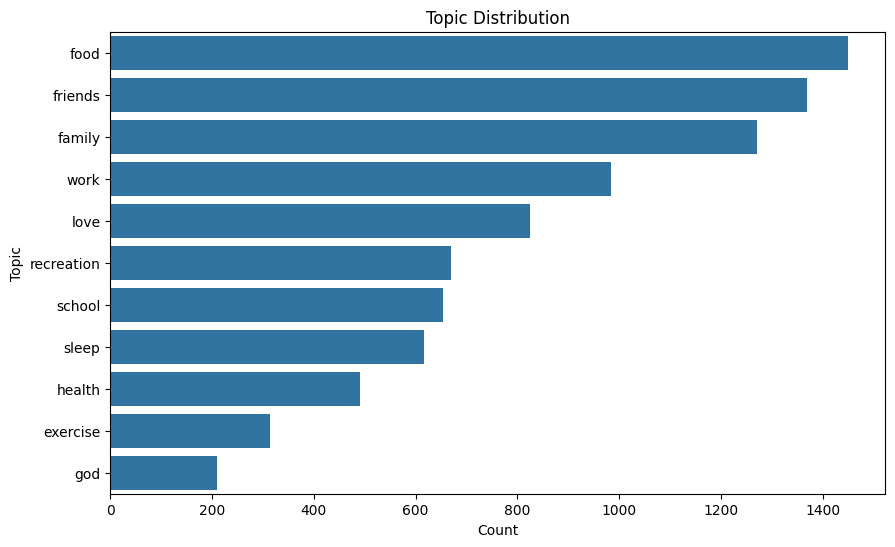

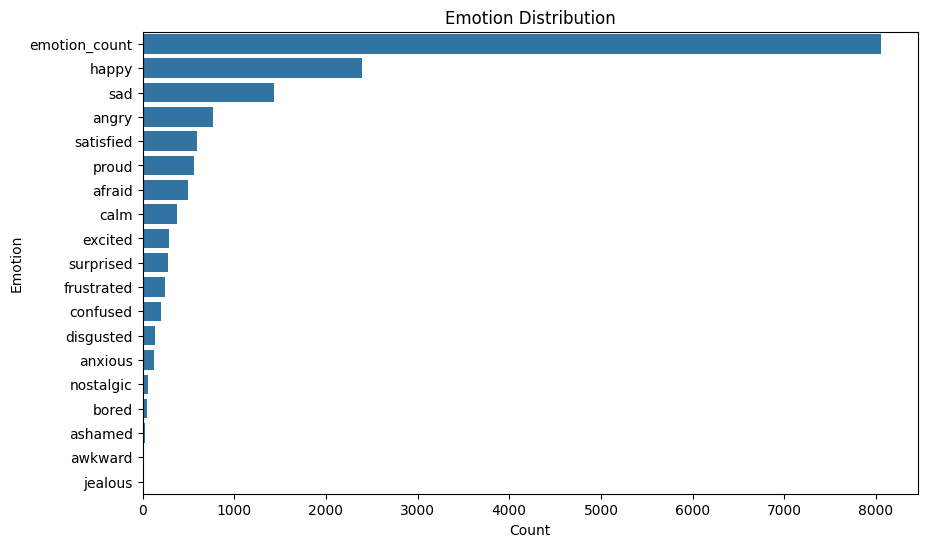

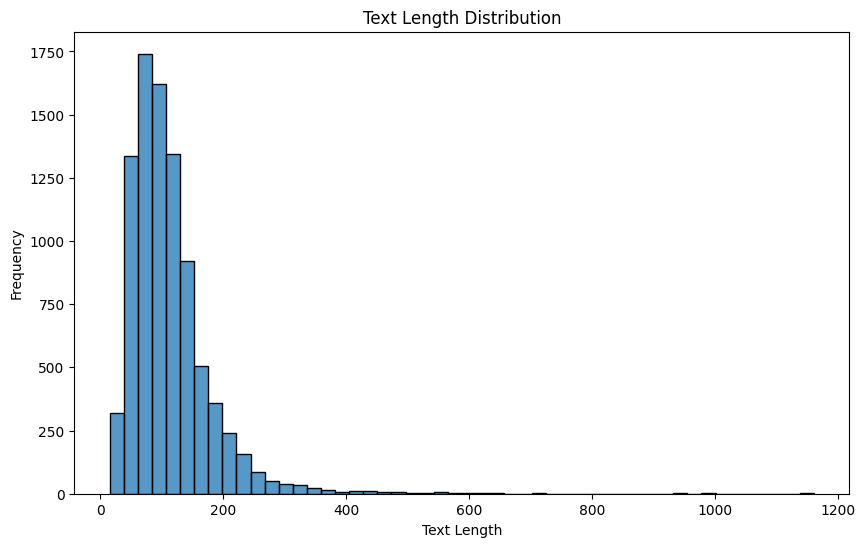

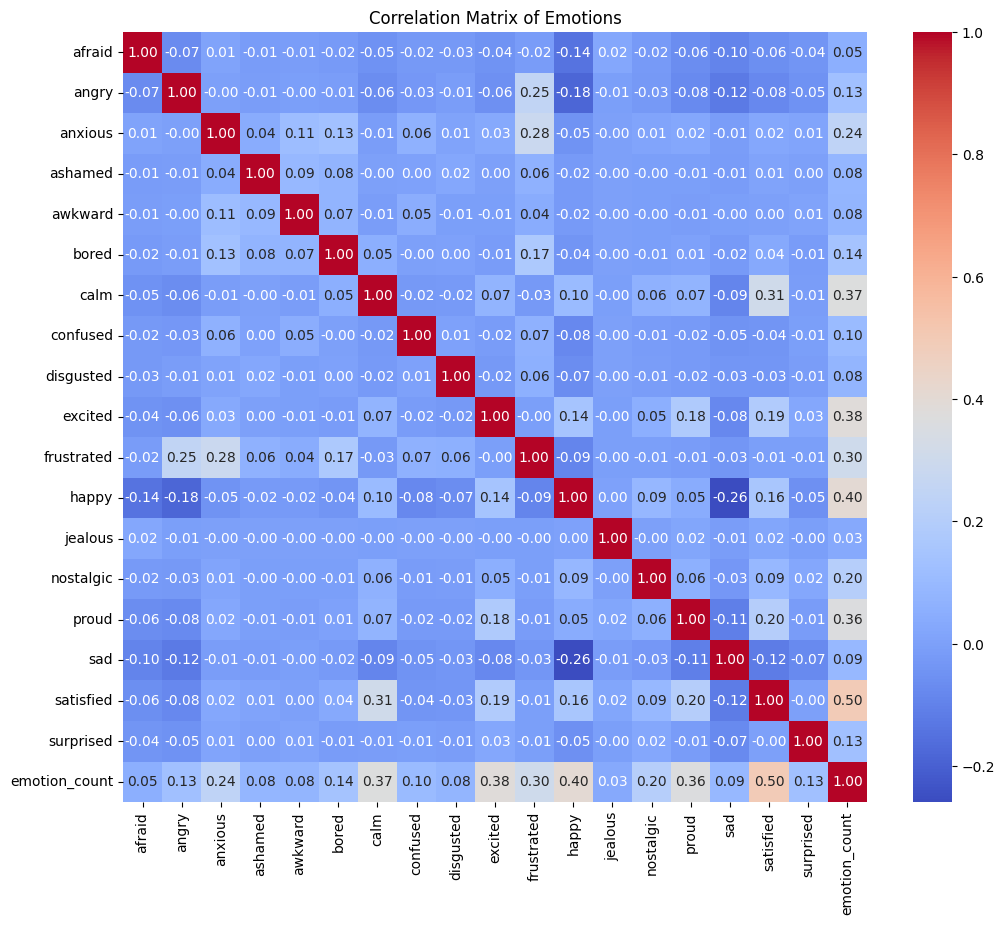

In [17]:
# Topic Distribution
topic_counts = merged_df['topic'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=topic_counts.index, x=topic_counts.values)
plt.ylabel('Topic')
plt.xlabel('Count')
plt.title('Topic Distribution')
plt.show()

# Emotion Distribution
emotion_columns = [col for col in merged_df.columns if col not in ['text', 'topic']]

emotion_distribution = merged_df[emotion_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=emotion_distribution.index, x=emotion_distribution.values)
plt.ylabel('Emotion')
plt.xlabel('Count')
plt.title('Emotion Distribution')
plt.show()


# Text Length Analysis
merged_df['text_length'] = merged_df['text'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()


# Correlation between Emotions
emotion_correlation = merged_df[emotion_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(emotion_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Emotions')
plt.show()

## Remove underrepresentative emotions

In [18]:
# Drop underrepresentative emotion columns (count < 100)
emotion_columns = [col for col in merged_df.columns if col not in ['text', 'topic']]
for col in emotion_columns:
    if merged_df[col].sum() < 100:
        merged_df = merged_df.drop(columns=[col])

# Drop entries with zero emotion counts across all columns
emotion_columns = [col for col in merged_df.columns if col not in ['text', 'topic']]
merged_df = merged_df[merged_df[emotion_columns].sum(axis=1) != 0]

# Drop the emotion_count column
merged_df = merged_df.drop(columns=['emotion_count'])

print(merged_df.shape)
merged_df.head()

(8852, 16)


,text,afraid,angry,anxious,calm,confused,disgusted,excited,frustrated,happy,proud,sad,satisfied,surprised,topic,text_length
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,1,1,0,0,0,family,384
1,Yoga keeps me focused. I am able to take some ...,0,0,0,1,0,0,0,0,0,0,0,0,0,exercise,150
2,"Yesterday, my family and I played a bunch of b...",0,0,0,1,0,0,0,0,1,0,0,1,0,family,248
3,"Yesterday, I visited my parents and had dinner...",0,0,0,1,0,0,0,0,1,0,0,0,0,family,149
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,1,0,0,0,0,health,333


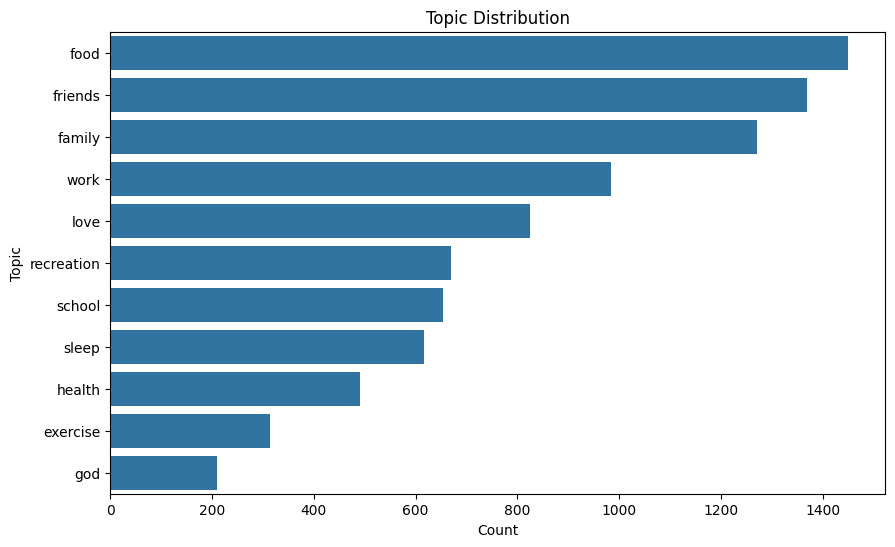

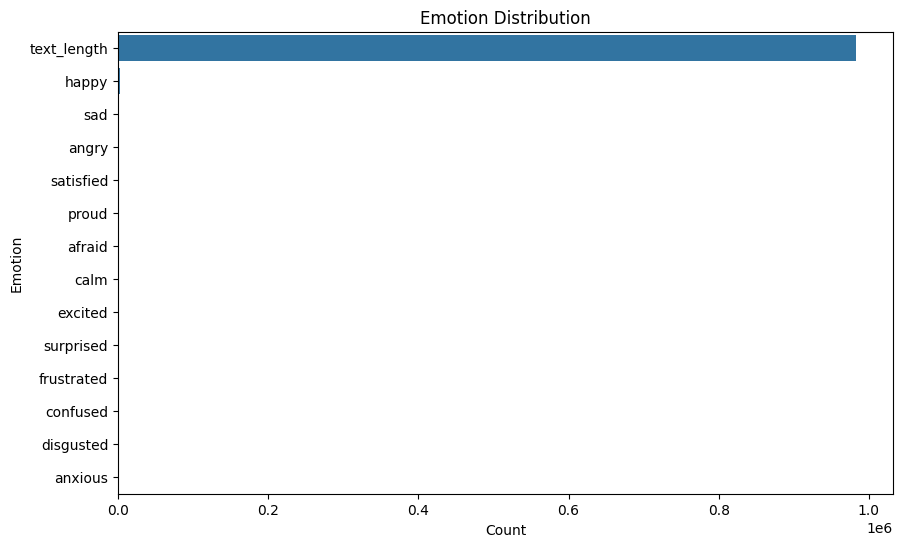

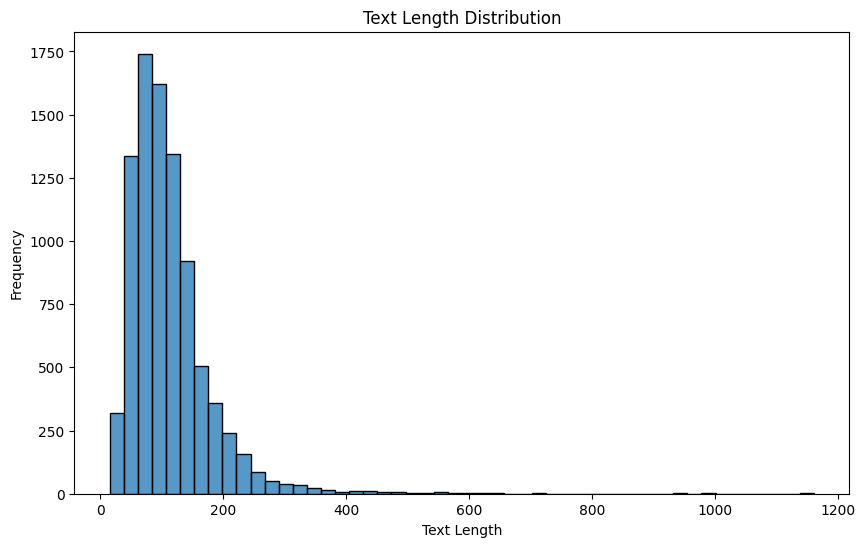

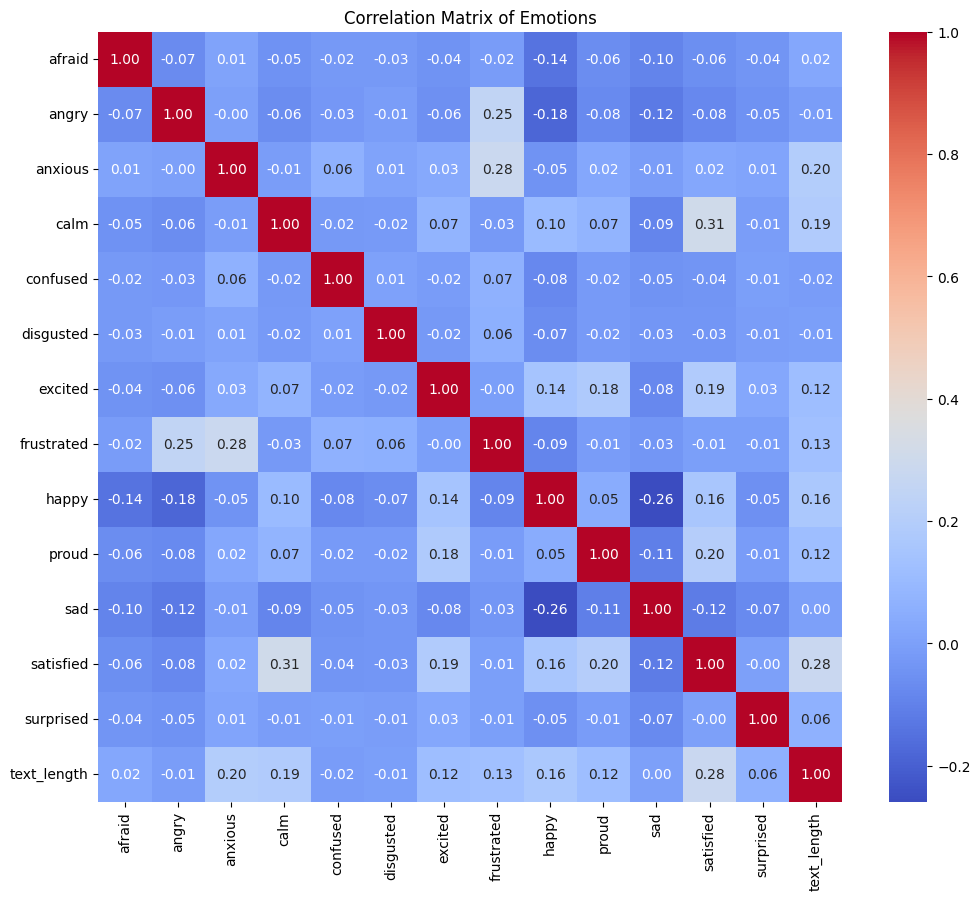

In [19]:
# Topic Distribution
topic_counts = merged_df['topic'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=topic_counts.index, x=topic_counts.values)
plt.ylabel('Topic')
plt.xlabel('Count')
plt.title('Topic Distribution')
plt.show()

# Emotion Distribution
emotion_columns = [col for col in merged_df.columns if col not in ['text', 'topic']]

emotion_distribution = merged_df[emotion_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=emotion_distribution.index, x=emotion_distribution.values)
plt.ylabel('Emotion')
plt.xlabel('Count')
plt.title('Emotion Distribution')
plt.show()


# Text Length Analysis
merged_df['text_length'] = merged_df['text'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()


# Correlation between Emotions
emotion_correlation = merged_df[emotion_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(emotion_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Emotions')
plt.show()

# Save merged df

In [20]:
merged_df.to_csv("merged_df.csv", index=False)
from google.colab import files
files.download('merged_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>